In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from itertools import combinations
from sklearn.metrics import accuracy_score

## Wczytywanie danych

In [2]:
animalsData = pd.read_csv("animals.csv")
animalsData = animalsData.set_index("animal")
animalsData.columns = ["warm-blooded","can fly","vertebrate","endangered","live in groups","have hair"]
animalsData.fillna(0)

warm-blooded  can fly  vertebrate  endangered  live in groups  \
animal                                                                  
ant                1        1           1         1.0             2.0   
bee                1        2           1         1.0             2.0   
cat                2        1           2         1.0             1.0   
cpl                1        1           1         1.0             1.0   
chi                2        1           2         2.0             2.0   
cow                2        1           2         1.0             2.0   
duc                2        2           2         1.0             2.0   
eag                2        2           2         2.0             1.0   
ele                2        1           2         2.0             2.0   
fly                1        2           1         1.0             1.0   
fro                1        1           2         2.0             0.0   
her                1        1           2         1.0             2.0   
lio                2        1           2         0.0             2.0   
liz                1        1           2         1.0             1.0   
lob                1        1           1         1.0             0.0   
man                2        1           2         2.0             2.0   
rab                2        1           2         1.0             2.0   
sal                1        1           2         1.0             0.0   
spi                1        1           1         0.0             1.0   
wha                2        1           2         2.0             2.0   

        have hair  
animal             
ant             1  
bee             2  
cat             2  
cpl             2  
chi             2  
cow             2  
duc             1  
eag             1  
ele             1  
fly             1  
fro             1  
her             1  
lio             2  
liz             1  
lob             1  
man             2  
rab             2  
sal             1  
spi             2  
wha             1

## Tworzenie heat mapy

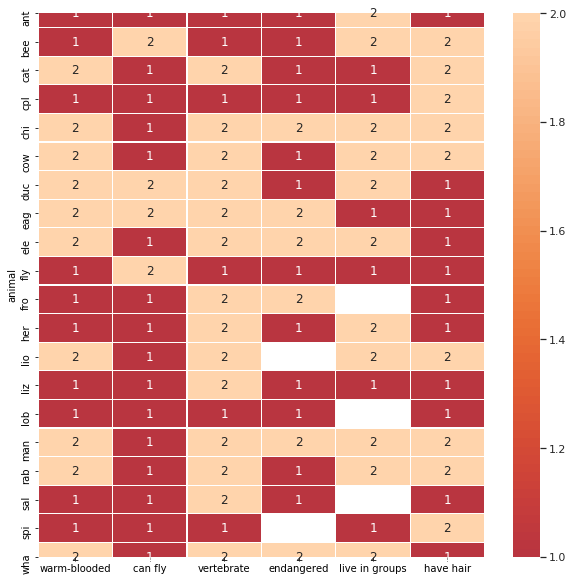

In [3]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
sns.set(color_codes=True)
ax = sns.heatmap(animalsData, annot=True, center=0, linewidths=.2)

## II clustering

### tworzenie danych

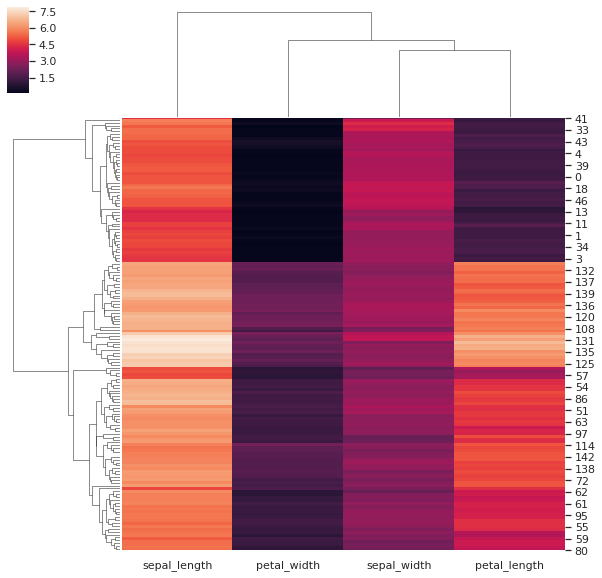

In [4]:
iris = sns.load_dataset("iris")
species = iris.pop("species")
sns.clustermap(iris)

In [5]:
predict_main = []
for i in range(len(species)):
    if species[i] == "setosa":
        predict_main.append(1)
    elif species[i] == "versicolor":
        predict_main.append(0)
    elif species[i] == "virginica":
        predict_main.append(2)

### kombinacje podwójne

In [6]:
combination = []
score = []
kmeans = []
predict = []

In [7]:
for combo in combinations(iris.columns,2):
    combination.append(combo[0]+" and " + combo[1])
    data = iris[[combo[0],combo[1]]]
    tmp = KMeans(n_clusters=3, random_state=0).fit(X=data)
    kmeans.append(tmp)
    pred = tmp.predict(X=data)
    predict.append(pred)
    score.append(accuracy_score(predict_main,pred))

### kombinacje potrójne

In [8]:
for combo in combinations(iris.columns,3):
    combination.append(combo[0]+" and " + combo[1] + " and " + combo[2])
    data = iris[[combo[0],combo[1], combo[2]]]
    tmp = KMeans(n_clusters=3, random_state=0).fit(X=data)
    kmeans.append(tmp)
    pred = tmp.predict(X=data)
    predict.append(pred)
    score.append(accuracy_score(predict_main,pred))

### kombinacje poczwórne

In [9]:
for combo in combinations(iris.columns,4):
    combination.append(combo[0]+" and " + combo[1] + " and " + combo[2] + " and " + combo[3])
    data = iris[[combo[0],combo[1], combo[2], combo[3]]]
    tmp = KMeans(n_clusters=3, random_state=0).fit(X=data)
    kmeans.append(tmp)
    pred = tmp.predict(X=data)
    predict.append(pred)
    score.append(accuracy_score(predict_main,pred))

In [10]:
results = pd.DataFrame(score, columns={"Score"}, index=combination)
results.sort_values(by=['Score'])

Score
petal_length and petal_width                        0.026667
sepal_width and petal_width                         0.040000
sepal_width and petal_length                        0.060000
sepal_length and sepal_width and petal_width        0.100000
sepal_length and petal_width                        0.126667
sepal_length and petal_length and petal_width       0.240000
sepal_length and petal_length                       0.253333
sepal_width and petal_length and petal_width        0.300000
sepal_length and sepal_width                        0.820000
sepal_length and sepal_width and petal_length       0.880000
sepal_length and sepal_width and petal_length a...  0.893333